In [ ]:
!pwd

/content


In [1]:
#import pandas for data
import pandas as pd

#plotting imports
#import matlab
import matplotlib.pyplot as plt
# import the library
import seaborn as sns
sns.set_theme(color_codes=True)
import numpy as np

#Import statmodels for regressions
import statsmodels.formula.api as smf
#import regression libraries
import statsmodels.api as sm

palette = sns.color_palette("rocket")

# Assign spreadsheet filename: file
# file = 'filename.xlsx'
US_Canada_file = pd.read_excel('./US-Canada_for_Python.xlsx')
print(US_Canada_file)
US_India_file = pd.read_excel('./US-India_for_Python.xlsx')
print(US_India_file)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


           CAN_M        CAN_X  ... CAN_Ln_REX  CAN_Ln_VOL
0    35124203.52  54985985.06  ...      -1.80       -1.77
1    42034477.15  30366007.19  ...      -1.80       -1.77
2    35256487.73  18502305.11  ...      -1.80       -1.77
3    11127207.43   6173198.21  ...      -1.80       -1.77
4     5117875.05   7245108.26  ...      -1.80       -1.77
..           ...          ...  ...        ...         ...
255  90644281.53  24408421.91  ...      -2.01       -2.15
256  31753561.36  69009724.36  ...      -2.01       -2.15
257  23269640.10  17206319.86  ...      -2.01       -2.15
258  13891809.62  16973295.66  ...      -2.01       -2.15
259  60981425.43  62876854.35  ...      -2.01       -2.15

[260 rows x 17 columns]
          IND_M       IND_X  ... IND_Ln_REX  IND_Ln_VOL
0     162621.73  1088706.61  ...       1.88       -1.75
1     105611.57   214171.45  ...       1.88       -1.75
2     231772.62   714851.64  ...       1.88       -1.75
3       9266.63   200875.38  ...       1.88       -1.75

In [2]:
#Canada Exports Equation 1 Regression
# In the paper,this is equation 2

# E2 Regression Model: lm(logX_CAN ~ logIncome_CAN + logREX_CAN + logVOL_CAN + Year_CAN + Comm_CAN
CAN_E1_results = smf.ols('CAN_Ln_X ~ CAN_Ln_Y_US + CAN_Ln_REX + CAN_Ln_VOL + t + Comm_Codes', data=US_Canada_file).fit(cov_type='HC3')
CAN_E1_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               CAN_Ln_X   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     19.33
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           2.65e-16
Time:                        17:24:58   Log-Likelihood:                -86.427
No. Observations:                 260   AIC:                             184.9
Df Residuals:                     254   BIC:                             206.2
Df Model:                           5                                         
Covariance Type:                  HC3                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       9.0012     32.230      0.279      0.780     -54.169      72.171
CAN_Ln_Y_US     1.3128      1.549      0.847      0.397      -1.724       4.350
CAN_Ln_REX     -0.6116      0.382     -1.601      0.109      -1.360       0.137
CAN_Ln_VOL     -0.0272      0.088     -0.307      0.759      -0.200       0.146
t              -0.0098      0.026     -0.381      0.703      -0.061       0.041
Comm_Codes     -0.0487      0.007     -7.019      0.000      -0.062      -0.035
==============================================================================
Omnibus:                        4.851   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.088   Jarque-Bera (JB):                4.650
Skew:                          -0.278   Prob(JB):                       0.0978
Kurtosis:                       2.653   Cond. No.                     3.01e+06
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 3.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [3]:
#Canada Imports (CAN_E2) REgression
# In the paper, this is equation 1
# Fit regression model 
#  Paper E1 Regression Model: lm(logM_CAN ~ logUSIncome_CAN + logREX_CAN + logVOL_CAN + Year_CAN + Comm_CAN

CAN_E2_results = smf.ols('CAN_Ln_M ~ CAN_Ln_Y_US + CAN_Ln_REX + CAN_Ln_VOL + t + Comm_Codes', data=US_Canada_file).fit(cov_type='HC3')
CAN_E2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               CAN_Ln_M   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     19.85
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           1.07e-16
Time:                        17:28:00   Log-Likelihood:                -36.200
No. Observations:                 260   AIC:                             84.40
Df Residuals:                     254   BIC:                             105.8
Df Model:                           5                                         
Covariance Type:                  HC3                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      54.6300     25.854      2.113      0.035       3.957     105.303
CAN_Ln_Y_US     2.9881      1.201      2.488      0.013       0.634       5.342
CAN_Ln_REX     -0.5318      0.332     -1.603      0.109      -1.182       0.118
CAN_Ln_VOL     -0.0422      0.073     -0.575      0.566      -0.186       0.102
t              -0.0434      0.020     -2.123      0.034      -0.084      -0.003
Comm_Codes     -0.0486      0.007     -7.377      0.000      -0.062      -0.036
==============================================================================
Omnibus:                       10.787   Durbin-Watson:                   2.435
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                5.092
Skew:                           0.039   Prob(JB):                       0.0784
Kurtosis:                       2.319   Cond. No.                     3.01e+06
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 3.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [4]:
#India Exports (IND_E1) Equation 1 Regression
# In the paper, this is equation 2

# Paper's E2 Regression Model: lm(logX_CAN ~ logIncome_CAN + logREX_CAN + logVOL_CAN + Year_CAN + Comm_CAN
IND_E1_results = smf.ols('IND_Ln_Y_US ~ Ln_Y_India + IND_Ln_REX + IND_Ln_VOL', data=US_India_file).fit(cov_type='HC3')
IND_E1_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            IND_Ln_Y_US   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     307.0
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           1.79e-84
Time:                        17:29:24   Log-Likelihood:                 315.86
No. Observations:                 260   AIC:                            -623.7
Df Residuals:                     256   BIC:                            -609.5
Df Model:                           3                                         
Covariance Type:                  HC3                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.4910      0.601     22.445      0.000      12.313      14.669
Ln_Y_India     0.1143      0.037      3.073      0.002       0.041       0.187
IND_Ln_REX    -0.9733      0.091    -10.682      0.000      -1.152      -0.795
IND_Ln_VOL    -0.0006      0.009     -0.067      0.947      -0.019       0.017
==============================================================================
Omnibus:                       25.014   Durbin-Watson:                   0.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.427
Skew:                          -0.735   Prob(JB):                     1.83e-06
Kurtosis:                       2.475   Cond. No.                     1.63e+03
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 1.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
#India Imports (CAN_E2) REgression
# In the paper, this is equation 1
# Fit regression model 
# Paper E1 Regression Model: lm(logM_CAN ~ logUSIncome_CAN + logREX_CAN + logVOL_CAN + Year_CAN + Comm_CAN 
IND_E2_results = smf.ols('IND_Ln_M ~ IND_Ln_Y_US + IND_Ln_REX + IND_Ln_VOL + t + Comm_Codes', data=US_India_file).fit(cov_type='HC3')
IND_E2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               IND_Ln_M   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     3.500
Date:                Wed, 01 Dec 2021   Prob (F-statistic):            0.00446
Time:                        17:30:13   Log-Likelihood:                -285.61
No. Observations:                 260   AIC:                             583.2
Df Residuals:                     254   BIC:                             604.6
Df Model:                           5                                         
Covariance Type:                  HC3                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -126.3412    111.771     -1.130      0.258    -345.409      92.726
IND_Ln_Y_US    -3.3563      3.759     -0.893      0.372     -10.725       4.012
IND_Ln_REX      0.3705      1.454      0.255      0.799      -2.479       3.220
IND_Ln_VOL      0.0808      0.081      0.997      0.319      -0.078       0.240
t               0.0873      0.079      1.110      0.267      -0.067       0.242
Comm_Codes      0.0076      0.015      0.506      0.613      -0.022       0.037
==============================================================================
Omnibus:                        9.309   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               12.033
Skew:                          -0.284   Prob(JB):                      0.00244
Kurtosis:                       3.887   Cond. No.                     4.73e+06
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 4.73e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

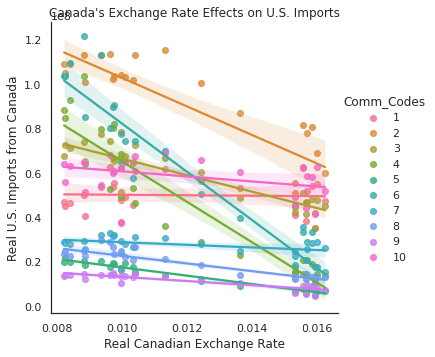

In [6]:
#Canadian Imports with Comm Codes
sns.set_style('white')
sns.set_palette("Greens_r")
Canada_Imports = sns.lmplot(x ="CAN_REX", y ="CAN_M", hue = "Comm_Codes", data = US_Canada_file, 
           robust=True)
Canada_Imports.set(title="Canada's Exchange Rate Effects on U.S. Imports").set_axis_labels("Real Canadian Exchange Rate", "Real U.S. Imports from Canada")


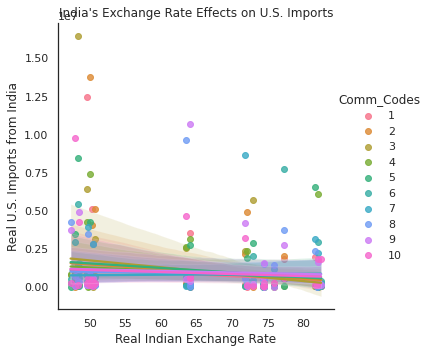

In [ ]:
#Indian Imports with Comm Codes
sns.set_style('white')
sns.set_palette("Greens_r")

Indian_Imports = sns.lmplot(x ="IND_REX", y ="IND_M", hue = "Comm_Codes", data = US_India_file, 
                            robust=True)
Indian_Imports.set_axis_labels("Real Indian Exchange Rate", "Real U.S. Imports from India")
Indian_Imports.set(title="India's Exchange Rate Effects on U.S. Imports").set_axis_labels("Real Indian Exchange Rate", "Real U.S. Imports from India")


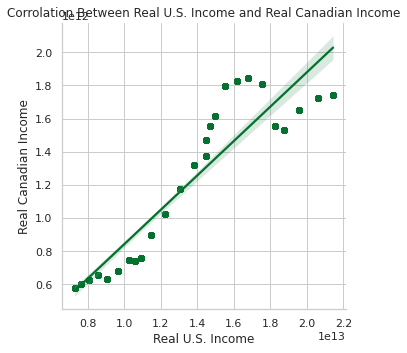

In [ ]:
#Canada and U.S. Income
sns.set_style('whitegrid')
sns.set_palette("Greens_r")

sns.color_palette("rocket", as_cmap=True)
Canada_Exports = sns.lmplot(x ="CAN_Y_US", y ="CAN_Y", data = US_Canada_file,
            robust=True);
Canada_Exports.set_axis_labels("Real U.S. Income", "Real Canadian Income")
Canada_Exports.set(title='Corrolation Between Real U.S. Income and Real Canadian Income')

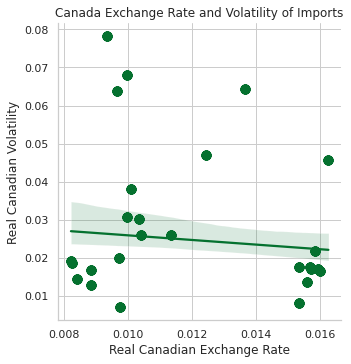

In [ ]:
#Canada Exchange Rate Between Volume of Imports
#Relationship between exchange rate and volume of imports/exports (4 or 6)

sns.set_style('whitegrid')
sns.set_palette("Greens_r")

CRVI = sns.lmplot(x ="CAN_REX", y ="CAN_VOL", data = US_Canada_file,
            robust=True, scatter_kws={"s": 80})
CRVI.set(title='Canada Exchange Rate and Volatility of Imports').set_axis_labels("Real Canadian Exchange Rate", "Real Canadian Volatility")

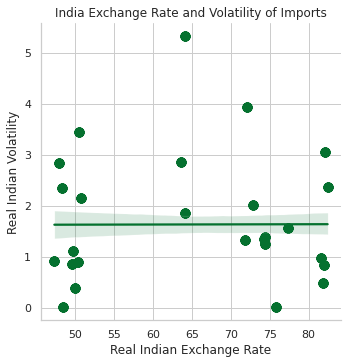

In [ ]:
#Indian Exchange Rate Between Volatility
#Relationship between exchange rate and volatility of imports/exports (4 or 6)

sns.set_style('whitegrid')
sns.set_palette("Greens_r")

IERV = sns.lmplot(x ="IND_REX", y ="IND_VOL", data = US_India_file,
                  robust=True, scatter_kws={"s": 80});
IERV.set(title='India Exchange Rate and Volatility of Imports').set_axis_labels("Real Indian Exchange Rate", "Real Indian Volatility")

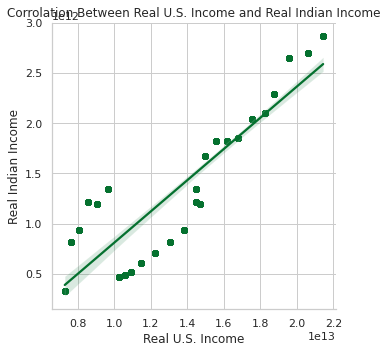

In [ ]:
#India and U.S. Income
sns.set_style('whitegrid')
sns.set_palette("Greens_r")

Canada_Exports = sns.lmplot(x ="IND_Y_US", y ="IND_Y", data = US_India_file,
            robust=True);
Canada_Exports.set_axis_labels("Real U.S. Income", "Real Indian Income")
Canada_Exports.set(title='Corrolation Between Real U.S. Income and Real Indian Income')

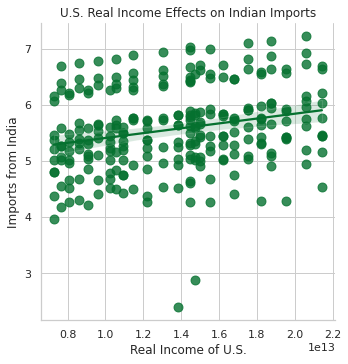

In [ ]:
#Imports India
sns.set_style('whitegrid')
sns.set_palette("Greens_r")

sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)
Imports_India= sns.lmplot(x ="IND_Y_US", y ="IND_Ln_M", data = US_India_file,
            robust=True, scatter_kws={"s": 80});
Imports_India.set(title='U.S. Real Income Effects on Indian Imports').set_axis_labels("Real Income of U.S.", "Imports from India")

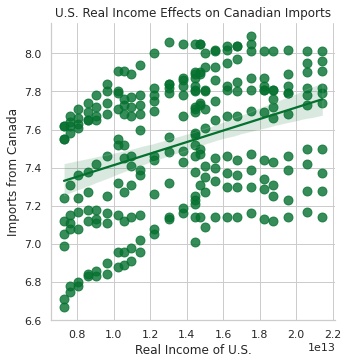

In [ ]:
#Imports Canada
sns.set_style('whitegrid')
sns.set_palette("Greens_r")

sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)
Exports_Canada= sns.lmplot(x ="CAN_Y_US", y ="CAN_Ln_M", data = US_Canada_file,
            robust=True, scatter_kws={"s": 80});
Exports_Canada.set(title='U.S. Real Income Effects on Canadian Imports').set_axis_labels("Real Income of U.S.", "Imports from Canada")

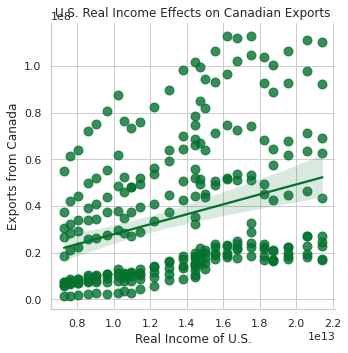

In [ ]:
#Exports Canada (stilll working)
sns.set_style('whitegrid')
sns.set_palette("Greens_r")

sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)
Exports_Canada= sns.lmplot(x ="CAN_Y_US", y ="CAN_X", data = US_Canada_file,
            robust=True, scatter_kws={"s": 80});
Exports_Canada.set(title='U.S. Real Income Effects on Canadian Exports').set_axis_labels("Real Income of U.S.", "Exports from Canada")

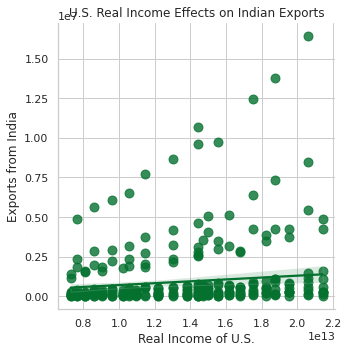

In [ ]:
#Exports India
sns.set_style('whitegrid')
sns.set_palette("Greens_r")

Exports_India = sns.lmplot(x ="IND_Y_US", y ="IND_M", data = US_India_file,
            robust=True, scatter_kws={"s": 80});
Exports_India.set(title='U.S. Real Income Effects on Indian Exports').set_axis_labels("Real Income of U.S.", "Exports from India")